In [188]:
# Getting all libraries

In [322]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

In [278]:
# getting the csv file
preg = pd.read_csv('pricemart_500_9500_hbap.csv')
# converting column name by replacing space with underscore and making those lower
preg.columns = preg.columns.str.lower().str.replace(' ','_')


In [279]:
# converting target column to numpy array
y = preg['pregnant'].to_numpy()

In [280]:
# converting predictor column to numpy array
X = preg[['apt', 'birth_control', 'body_pillow', 'cigarettes', 'female',
       'feminine_hygiene', 'folic_acid', 'ginger_ale', 'home',
       'ice_cream', 'male', 'maternity_clothes',
       'pregnancy_test', 'prenatal_vitamins', 'prenatal_yoga',
       'sea_bands', 'smoking_cessation', 'stopped_buying_ciggies',
       'stopped_buying_wine', 'wine']].to_numpy()

# Creating Training and Test Dataset 
# First with train_test_split making two datsets , one for Training and other for holdout

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [296]:
# Counting unique keys in y i.e. target for both train and test
def count_unique(keys):
    uniq_keys = np.unique(keys)
    bins = uniq_keys.searchsorted(keys)
    return uniq_keys, np.bincount(bins)

In [297]:
count_unique(y_train)

(array([0, 1]), array([7600,  400]))

In [298]:
count_unique(y_test)

(array([0, 1]), array([1900,  100]))

In [299]:
# 5 Fold CV
# To determine C value by making log loss as metric 

In [301]:
skf = StratifiedKFold(n_splits=5, random_state=101)

In [308]:
skf.get_n_splits(X_train,y_train)

for cvalue in [0.001,0.01,0.1,1,10,100,1000,10000,100000]:
    avg_log_loss = []
    for train_index, test_index in skf.split(X_train,y_train):
        
        X_train_fold, X_test_fold = X_train[train_index,:],X_train[test_index,:]
        y_train_fold , y_test_fold = y_train[train_index],y_train[test_index]
        
        clf = LogisticRegression(random_state=101,max_iter=500, C=cvalue, solver='lbfgs').fit(X_train_fold,y_train_fold)
        preds = clf.predict_proba(X_test_fold)[:,1]
        
        avg_log_loss.append(log_loss(y_test_fold,preds))
        
    print("C:=",cvalue, "Logloss 5 Fold:", np.mean(avg_log_loss))

C:= 0.001 Logloss 5 Fold: 0.1864007661516529
C:= 0.01 Logloss 5 Fold: 0.16396455896284445
C:= 0.1 Logloss 5 Fold: 0.13671574005373824
C:= 1 Logloss 5 Fold: 0.1316880052769674
C:= 10 Logloss 5 Fold: 0.13166236456011518
C:= 100 Logloss 5 Fold: 0.1317009326244934
C:= 1000 Logloss 5 Fold: 0.13169859262750364
C:= 10000 Logloss 5 Fold: 0.13170883786290136
C:= 100000 Logloss 5 Fold: 0.1316950515243052


In [306]:
# Best logloss is obtained at C = 10

In [310]:
logistic = LogisticRegression(random_state=0).fit(X_train,y_train)

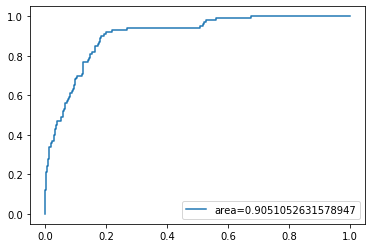

In [319]:
# ROC / AUC Curve
y_test_prob = logistic.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_test_prob)
auc = metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [331]:
confusion_matrix = confusion_matrix(y_test,logistic.predict(X_test))


TypeError: 'numpy.ndarray' object is not callable

In [328]:
cmtx = pd.DataFrame(confusion_matrix,index=['true:yes','true:no'],columns=['pred:yes','pred:no'])

In [329]:
print(cmtx)

          pred:yes  pred:no
true:yes      1896        4
true:no         85       15


In [330]:
print(classification_report(y_test,logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1900
           1       0.79      0.15      0.25       100

   micro avg       0.96      0.96      0.96      2000
   macro avg       0.87      0.57      0.61      2000
weighted avg       0.95      0.96      0.94      2000



In [332]:
log_loss(y_test,y_test_prob)

0.12992325581810207

In [339]:
X = ['apt', 'birth_control', 'body_pillow', 'cigarettes', 'female',
       'feminine_hygiene', 'folic_acid', 'ginger_ale', 'home',
       'ice_cream', 'male', 'maternity_clothes',
       'pregnancy_test', 'prenatal_vitamins', 'prenatal_yoga',
       'sea_bands', 'smoking_cessation', 'stopped_buying_ciggies',
       'stopped_buying_wine', 'wine']

In [342]:
LogisticCoef = pd.concat([pd.DataFrame(X),pd.DataFrame(np.transpose(logistic.coef_))],axis=1)

In [344]:
LogisticCoef.columns=['Variables','Logistic_Coefficient']

In [346]:
LogisticCoef['Logistic_Coefficient'] = LogisticCoef['Logistic_Coefficient'].apply(abs)
LogisticCoef.sort_values(by='Logistic_Coefficient',ascending=False)

,Variables,Logistic_Coefficient
14,prenatal_yoga,2.543344
6,folic_acid,2.386952
1,birth_control,2.360406
19,wine,2.137044
5,feminine_hygiene,1.928756
3,cigarettes,1.762088
16,smoking_cessation,1.276863
12,pregnancy_test,1.245504
11,maternity_clothes,0.949322
15,sea_bands,0.669173


# Ridge Regression (also called as "L2 Regularization")
# shrinks beta coefficient towards 0

In [355]:
ridge = LogisticRegression(penalty='l2',C=10,solver='lbfgs',max_iter=500,random_state=101).fit(X_train,y_train)

In [357]:
ridge.coef_

array([[-0.33281332, -2.49569222, -0.22151689, -1.8682412 ,  0.05998551,
        -2.00339036,  2.50908004,  0.29457133, -0.04428497, -0.00397418,
        -0.13056898,  1.00699141,  1.36437299,  0.06498706,  3.19883452,
         0.74694575,  1.40526684,  0.37958809,  0.50675041, -2.35047794]])

# Running Linear Regression

In [266]:
# Running Linear Regression model
regr = linear_model.LinearRegression()

In [267]:
# Scoring the model with cross val score
scores = cross_val_score(regr,X,y,cv=10,scoring='neg_mean_squared_error')

In [268]:
# Getting mean for the cross val based on K
scores.mean()

-0.05810309239140769

In [269]:
# getting all the score
scores

array([-0.5       , -0.00527645, -0.00732779, -0.00966924, -0.01453919,
       -0.00473762, -0.0060859 , -0.00835274, -0.01124937, -0.01379264])

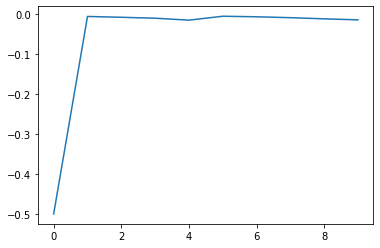

In [270]:
plt.plot(scores)

In [202]:
cv_results = cross_validate(regr, X,y,cv=10)

In [203]:
cv_results

/Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00998807, 0.00872493, 0.00472403, 0.00342607, 0.00300503,
        0.00372505, 0.00310707, 0.00397778, 0.00287414, 0.00621796]),
 'score_time': array([0.00180197, 0.00044417, 0.00036716, 0.00037503, 0.00038314,
        0.00055408, 0.0005219 , 0.00036478, 0.00035191, 0.00041604]),
 'test_score': array([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 'train_score': array([1.        , 0.18324564, 0.18718804, 0.19146679, 0.19930842,
        0.18219286, 0.18481906, 0.1891104 , 0.19418537, 0.19748172])}

In [204]:
# Linear rgression

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [206]:
regressor = LinearRegression()

In [207]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [208]:
print(regressor.intercept_)

0.005437516510527013


In [209]:
print(regressor.coef_)

[-8.19113214e-03 -4.67818060e-02  1.74134076e-02 -2.96150989e-02
  7.38281742e-03 -4.63199995e-02  4.26237218e-01  3.28621683e-02
  1.73648073e-03 -4.98269430e-05  1.35543378e-03  5.34554351e-02
  1.18091661e-01  2.19701063e-03  2.25318233e-01  1.83176763e-02
  8.09047773e-02  2.03302539e-02  3.01950867e-02 -3.56531054e-02]


In [210]:
y_pred = regressor.predict(X_test)

In [211]:
df = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})

In [212]:
df

,Actual,Predicted
0,0,0.015023
1,0,0.005965
2,0,0.018715
3,0,0.132698
4,0,0.103322
...,...,...
1995,0,0.088827
1996,0,0.066033
1997,0,0.083073
1998,0,-0.035824


In [213]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors

In [214]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 0.0986385829769479


In [215]:
# Mean Squared Error (MSE) is the mean of the squared errors

In [216]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 0.04156173212429504


In [217]:
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [218]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE:  0.20386694711084247


In [219]:
coeff_df = pd.DataFrame(regressor.coef_,['apt', 'birth_control', 'body_pillow', 'cigarettes', 'female',
       'feminine_hygiene', 'folic_acid', 'ginger_ale', 'home',
       'ice_cream', 'male', 'maternity_clothes',
       'pregnancy_test', 'prenatal_vitamins', 'prenatal_yoga',
       'sea_bands', 'smoking_cessation', 'stopped_buying_ciggies',
       'stopped_buying_wine', 'wine'],columns=['Coefficient'])

In [220]:
coeff_df

,Coefficient
apt,-0.008191
birth_control,-0.046782
body_pillow,0.017413
cigarettes,-0.029615
female,0.007383
feminine_hygiene,-0.046320
folic_acid,0.426237
ginger_ale,0.032862
home,0.001736
ice_cream,-0.000050


In [221]:
# Logistic Regression

In [222]:
logreg = LogisticRegression()

In [223]:
logreg.fit(X_train,y_train)

/Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [224]:
print(logreg.intercept_)

[-4.00681041]


In [225]:
print(logreg.coef_)

[[-2.98490205e-01 -2.50992205e+00  2.86312210e-03 -1.72023679e+00
   3.52868733e-02 -2.09531635e+00  2.40707398e+00  2.02376627e-01
   7.37064325e-02 -1.50377473e-03 -7.12957078e-02  9.75554915e-01
   1.27601271e+00  5.83016308e-02  2.40681834e+00  4.57857184e-01
   1.31260221e+00  1.76449370e-01  4.26199307e-01 -2.09120312e+00]]


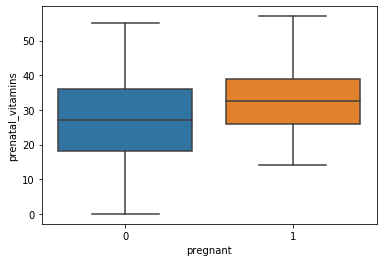

In [226]:
sns.boxplot(x='pregnant',y='prenatal_vitamins',data=preg)

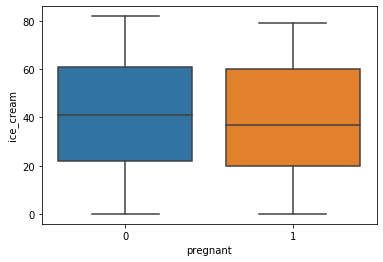

In [227]:
sns.boxplot(x='pregnant', y ='ice_cream', data=preg)

In [228]:
preg.head()

,apt,birth_control,body_pillow,cigarettes,female,feminine_hygiene,folic_acid,ginger_ale,home,ice_cream,...,maternity_clothes,pregnant,pregnancy_test,prenatal_vitamins,prenatal_yoga,sea_bands,smoking_cessation,stopped_buying_ciggies,stopped_buying_wine,wine
0,1,0,0,0,0,0,0,0,0,37,...,0,1,1,26,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,12,...,0,1,1,32,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,72,...,0,1,1,39,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,1,9,...,0,1,0,33,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,75,...,0,1,0,25,1,0,0,0,1,0


In [229]:
preg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
apt                       10000 non-null int64
birth_control             10000 non-null int64
body_pillow               10000 non-null int64
cigarettes                10000 non-null int64
female                    10000 non-null int64
feminine_hygiene          10000 non-null int64
folic_acid                10000 non-null int64
ginger_ale                10000 non-null int64
home                      10000 non-null int64
ice_cream                 10000 non-null int64
male                      10000 non-null int64
maternity_clothes         10000 non-null int64
pregnant                  10000 non-null int64
pregnancy_test            10000 non-null int64
prenatal_vitamins         10000 non-null int64
prenatal_yoga             10000 non-null int64
sea_bands                 10000 non-null int64
smoking_cessation         10000 non-null int64
stopped_buying_ciggies    10000 non-null int64

In [230]:
y_pred = logreg.predict(X_test)

In [231]:
df = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})

In [232]:
df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1995,0,0
1996,0,0
1997,0,0
1998,0,0


In [233]:
score = logreg.score(X_test,y_test)

In [234]:
score

0.958

In [235]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [236]:
cm

array([[1892,    3],
       [  81,   24]])

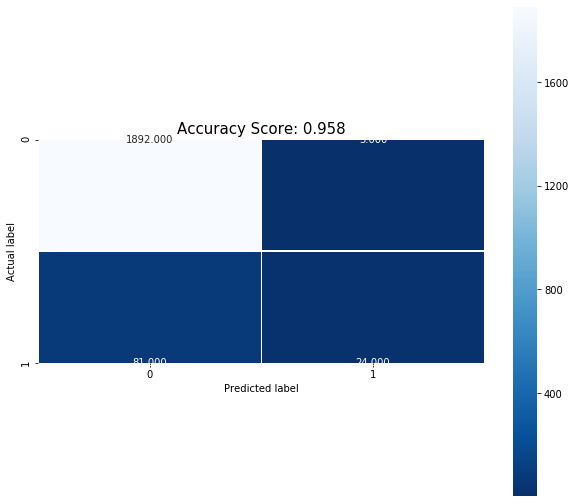

In [237]:
plt.figure(figsize=(10,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [238]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [239]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1895
           1       0.89      0.23      0.36       105

   micro avg       0.96      0.96      0.96      2000
   macro avg       0.92      0.61      0.67      2000
weighted avg       0.96      0.96      0.95      2000



In [240]:
# Precision : Ability of model to identify ONLY relevant instance
# Precision = TP / (TP+FP)

In [241]:
# Recall : Ability of model to identify ALL Relevant instances 
# Recall = tP / (TP+FN)

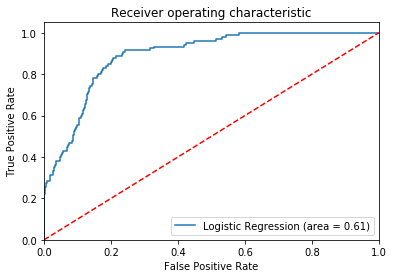

In [242]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [243]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.958
Precision: 0.8888888888888888
Recall: 0.22857142857142856


In [244]:
preg.head()

,apt,birth_control,body_pillow,cigarettes,female,feminine_hygiene,folic_acid,ginger_ale,home,ice_cream,...,maternity_clothes,pregnant,pregnancy_test,prenatal_vitamins,prenatal_yoga,sea_bands,smoking_cessation,stopped_buying_ciggies,stopped_buying_wine,wine
0,1,0,0,0,0,0,0,0,0,37,...,0,1,1,26,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,12,...,0,1,1,32,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,72,...,0,1,1,39,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,1,9,...,0,1,0,33,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,75,...,0,1,0,25,1,0,0,0,1,0


In [245]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import GridSearchCV

In [246]:
X, y = load_breast_cancer(return_X_y=True)

In [247]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [248]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [271]:
# Ridge classifier

In [272]:
clf = RidgeClassifier()

In [273]:
clf.fit(X,y)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [274]:
clf.score(X,y)

0.9552

In [276]:
# Ridgeclassifier Cross Validation

In [275]:
clf1 = RidgeClassifierCV(alphas=[1e-3,1]).fit(X,y)

In [253]:
clf1.score(X,y)

0.961335676625659

In [254]:
alphas = np.array([1,0.1,0.01])

In [255]:
model = RidgeClassifier()

In [256]:
ridge_class = GridSearchCV(estimator=model, param_grid=dict(alphas=alphas))

In [257]:
def ridge_regression(data,predictors,alpha,models_to_plot={}):
    ridge_classifier = RidgeClassifier(alpha=alpha)
    ridge_classifier.fit(X,y)
    y_pred = ridge_classifier.predict(y)
    
    if aplha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(X,y_pred)
        plt.plot(X,y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
        
    

In [258]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

In [259]:
models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

In [260]:
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(X, y, alpha_ridge[i], models_to_plot)

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.